# **CDSA1010 Lab 2 Group #2**


1. [Import data and python packages](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
    * 2.1. [Check for Missing Values](#t2.1.)
        * 2.1.1. [Check Gender Values](#t2.1.1.)
        * 2.1.2. [Check Education Values](#t2.1.2.)
        * 2.1.3. [Check Marital Status Values](#t2.1.3.)
    * 2.2.[Make adjustments to data from unique values assessment](#t2.2.)
    * 2.3.[Recheck Gender, Education and Marital Status unique values](#t2.3.)
    * 2.4.[Feauture Engineering](#t2.4.)
    * 2.5.[Create Categorical Features](#t2.5.)
3. [Exploratory Data Analysis](#t3.)
4. [Model Development and Results](#t4.)
    * 4.1. [Feature selection](#t4.1.)
        * 4.1.1. [Recursive feature elimination](#t4.1.1.)
        * 4.1.2. [Feature ranking with recursive feature elimination and cross-validation](#t4.1.2.)
    * 4.2. [Split data into train/test](#t4.2.)
    * 4.3. [Heat Map of Selected Features](#t4.3.)
    * 4.4. [Naive Bayes Model](#t4.4.)
    * 4.5. [K-Nearest Neighbours](#t4.5.)
    * 4.6. [Support Vector Machines (SVM)](#t4.6.)

<a id="t1."></a>
# 1. Import Libraries and Data into Python

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
#import data
ccd = pd.read_csv('CreditCardDefault.csv')
ccd_original = ccd.copy()

<a id="t2."></a>
# 2. Assess Data and Missing Values

In [41]:
#preview data
ccd.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
ccd.groupby('Y').count()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Y,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


In [43]:
ccd.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<a id="t2.1."></a>
## 2.1 Check for missing info

In [44]:
#check for missing info in dataset
ccd.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

No fields are missing values

<a id="t2.1.1."></a>
### 2.1.1 Check Gender values

In [45]:
ccd['X2'].unique()

array([2, 1], dtype=int64)

<a id="t2.1.2."></a>
### 2.1.2 Check Education Values

In [46]:
ccd['X3'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

Since we only have definitions for [1,2,3,4] but found [0,5,6] as well we will bucket them into the 'other' category of 4

<a id="t2.1.3."></a>
### 2.1.3 Check Marital Status Values

In [47]:
ccd['X4'].unique()

array([1, 2, 3, 0], dtype=int64)

In [48]:
ccd.groupby('X3').count()

,ID,X1,X2,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X3,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585,...,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585
2,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030,...,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030
3,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,...,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
4,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
5,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
6,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


Since we only have definitions for [1,2,3] but found [0] we will bucket this into the 'other' category of 3

<a id="t2.2."></a>
## 2.2 Make adjustments to data from unique values assessment

In [49]:
#create gender category
#ccd['X2'] = np.where(ccd['X2']==1, 'male', 'female')
gen_conditions = [
    (ccd['X2'] == 1),
    (ccd['X2'] == 2)
]
gen_choices = ['male', 'female']
ccd['X2'] = np.select(gen_conditions, gen_choices)
#repair extra values in Education and Marital Status columns
ed_conditions = [
    (ccd['X3'] == 0),
    (ccd['X3'] == 1),
    (ccd['X3'] == 2),
    (ccd['X3'] == 3),
    (ccd['X3'] == 4),
    (ccd['X3'] == 5),
    (ccd['X3'] == 6)]
ed_choices = ['other','graduate school', 'university', 'high school', 'other','other','other']
ccd['X3'] = np.select(ed_conditions, ed_choices)
marsta_conditions = [
    (ccd['X4'] == 0),
    (ccd['X4'] == 1),
    (ccd['X4'] == 2),
    (ccd['X4'] == 3)]
marsta_choices = ['other', 'married', 'single', 'other']
ccd['X4'] = np.select(marsta_conditions, marsta_choices)
# ccd['Y'] = np.where(ccd['Y']==1, 'default', 'no default')
ccd

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,high school,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [50]:
demographics = ccd[['X1', 'X2','X3', 'X4', 'X5', 'Y']].copy()
#rename column names
demographics.rename(columns={"X1":"CreditLimit","X2":"Gender", "X3":"Education", "X4":"MaritalStatus", "X5":"Age", "Y":"NextPayment"}, inplace=True)
#label output values
demographics['NextPayment'] = np.where(demographics['NextPayment']==1, 'default', 'no default')
demographics

,CreditLimit,Gender,Education,MaritalStatus,Age,NextPayment
0,20000,female,university,married,24,default
1,120000,female,university,single,26,default
2,90000,female,university,single,34,no default
3,50000,female,university,married,37,no default
4,50000,male,university,married,57,no default
5,50000,male,graduate school,single,37,no default
6,500000,male,graduate school,single,29,no default
7,100000,female,university,single,23,no default
8,140000,female,high school,married,28,no default
9,20000,male,high school,single,35,no default


<a id="t2.3."></a>
### 2.3 Recheck Gender, Education and Marital Status unique values

In [51]:
demographics['Gender'].unique()

array(['female', 'male'], dtype=object)

In [52]:
demographics['Education'].unique()

array(['university', 'graduate school', 'high school', 'other'],
      dtype=object)

In [53]:
demographics['MaritalStatus'].unique()

array(['married', 'single', 'other'], dtype=object)

<a id="t2.4."></a>
## 2.4 Feature Engineering

<a id="t2.4.1."></a>
### 2.4.1 Create a running total of payment history and plot against defaulted or not

In [54]:
ccd['paymentHist'] = ccd['X6'] + ccd['X7'] + ccd['X8'] + ccd['X9'] + ccd['X10'] + ccd['X11']   
financials=ccd[['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11','paymentHist', 'Y']].copy()
financials.rename(columns={"Y":"NextPayment"}, inplace=True)
financials['NextPayment'] = np.where(financials['NextPayment']==1, 'default', 'no default')

<a id="t2.4.2."></a>
### 2.4.2 Create ratio of previous 6 month statement balance over credit limit (Credit Utilization)

In [55]:
ccd['6monUtil'] = ((ccd['X12']+ccd['X13']+ccd['X14']+ccd['X15']+ccd['X16']+ccd['X17'])/6)/ccd['X1']

<a id="t2.4.3"></a>
### 2.4.3 Create ratio of average payment made over average balance (Bill Payment Utilization)

In [64]:
ccd['6monPmtRt'] = ((ccd['X18']+ccd['X19']+ccd['X20']+ccd['X21']+ccd['X22']+ccd['X23'])/6)/((ccd['X12']+ccd['X13']+ccd['X14']+ccd['X15']+ccd['X16']+ccd['X17'])/6)
ccd.loc[~np.isfinite(ccd['6monPmtRt']), '6monPmtRt'] = 0 #np.nan

<a id="t2.4.3"></a>
### 2.4.4 Create percentage of defaults in last 6 months (Default percentage)

In [65]:
ccd['6monDfRt'] = (np.where(ccd['X6']<=0,0,1) + np.where(ccd['X7']<=0,0,1) + np.where(ccd['X8']<=0,0,1) + np.where(ccd['X9']<=0,0,1)+np.where(ccd['X10']<=0,0,1)+np.where(ccd['X11']<=0,0,1))/6

In [66]:
#create finance dataframe
fin_feng = ccd[['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', '6monUtil', '6monPmtRt', '6monDfRt', 'Y']].copy()

In [67]:
#add descriptive column names to dataset
ccd2 = ccd.copy()
ccd2.rename(columns={"X1":"CreditLimit","X2":"Gender", "X3":"Education", "X4":"MaritalStatus", "X5":"Age", "Y":"NextPayment"}, inplace=True)


<a id="t2.5."></a>
## 2.5 Create categorical variables

In [68]:
ccd2

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,NextPayment,paymentHist,6monUtil,6monPmtRt,6monDfRt
0,1,20000,female,university,married,24,2,2,-1,-1,...,689,0,0,0,0,1,-2,0.064200,0.089434,0.333333
1,2,120000,female,university,single,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,3,0.023718,0.292791,0.333333
2,3,90000,female,university,single,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0.188246,0.108388,0.000000
3,4,50000,female,university,married,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0.771113,0.036259,0.000000
4,5,50000,male,university,married,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,-2,0.364463,0.540054,0.000000
5,6,50000,male,graduate school,single,37,0,0,0,0,...,1815,657,1000,1000,800,0,0,0.793713,0.032640,0.000000
6,7,500000,male,graduate school,single,29,0,0,0,0,...,40000,38000,20239,13750,13770,0,0,0.908198,0.066343,0.000000
7,8,100000,female,university,single,23,0,-1,-1,0,...,601,0,581,1687,1542,0,-3,0.022477,0.355257,0.000000
8,9,140000,female,high school,married,28,0,0,2,0,...,0,432,1000,1000,1000,0,2,0.077633,0.103677,0.166667
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,0,13007,1122,0,0,-10,0.224325,0.524871,0.000000


In [69]:
ccd3 = pd.get_dummies(ccd2, columns=['Gender', 'Education', 'MaritalStatus'])

In [70]:
ccd3

,ID,CreditLimit,Age,X6,X7,X8,X9,X10,X11,X12,...,6monDfRt,Gender_female,Gender_male,Education_graduate school,Education_high school,Education_other,Education_university,MaritalStatus_married,MaritalStatus_other,MaritalStatus_single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0.333333,1,0,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0.333333,1,0,0,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,0.000000,1,0,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,0.000000,1,0,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0.000000,0,1,0,0,0,1,1,0,0
5,6,50000,37,0,0,0,0,0,0,64400,...,0.000000,0,1,1,0,0,0,0,0,1
6,7,500000,29,0,0,0,0,0,0,367965,...,0.000000,0,1,1,0,0,0,0,0,1
7,8,100000,23,0,-1,-1,0,0,-1,11876,...,0.000000,1,0,0,0,0,1,0,0,1
8,9,140000,28,0,0,2,0,0,0,11285,...,0.166667,1,0,0,1,0,0,1,0,0
9,10,20000,35,-2,-2,-2,-2,-1,-1,0,...,0.000000,0,1,0,1,0,0,0,0,1


In [71]:
#create copy for converting categories to int for Naives Bayes model
ccd4 = ccd2.copy()
ccd4

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,NextPayment,paymentHist,6monUtil,6monPmtRt,6monDfRt
0,1,20000,female,university,married,24,2,2,-1,-1,...,689,0,0,0,0,1,-2,0.064200,0.089434,0.333333
1,2,120000,female,university,single,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,3,0.023718,0.292791,0.333333
2,3,90000,female,university,single,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0.188246,0.108388,0.000000
3,4,50000,female,university,married,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0.771113,0.036259,0.000000
4,5,50000,male,university,married,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,-2,0.364463,0.540054,0.000000
5,6,50000,male,graduate school,single,37,0,0,0,0,...,1815,657,1000,1000,800,0,0,0.793713,0.032640,0.000000
6,7,500000,male,graduate school,single,29,0,0,0,0,...,40000,38000,20239,13750,13770,0,0,0.908198,0.066343,0.000000
7,8,100000,female,university,single,23,0,-1,-1,0,...,601,0,581,1687,1542,0,-3,0.022477,0.355257,0.000000
8,9,140000,female,high school,married,28,0,0,2,0,...,0,432,1000,1000,1000,0,2,0.077633,0.103677,0.166667
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,0,13007,1122,0,0,-10,0.224325,0.524871,0.000000


In [72]:
#create gender category
ccd4['Gender'] = np.where(ccd4['Gender']=='male', 1, 2)
#repair extra values in Education and Marital Status columns
ed_conditions = [
    (ccd4['Education'] == 'graduate school'),
    (ccd4['Education'] == 'university'),
    (ccd4['Education'] == 'high school'),
    (ccd4['Education'] == 'other')]
ed_choices = [1,2,3,4]
ccd4['Education'] = np.select(ed_conditions, ed_choices)
marsta_conditions = [
    (ccd4['MaritalStatus'] == 'married'),
    (ccd4['MaritalStatus'] == 'single'),
    (ccd4['MaritalStatus'] == 'other')]
marsta_choices = [1,2,3]
ccd4['MaritalStatus'] = np.select(marsta_conditions, marsta_choices)

In [73]:
ccd4

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,NextPayment,paymentHist,6monUtil,6monPmtRt,6monDfRt
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,-2,0.064200,0.089434,0.333333
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,3,0.023718,0.292791,0.333333
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0.188246,0.108388,0.000000
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0.771113,0.036259,0.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,-2,0.364463,0.540054,0.000000
5,6,50000,1,1,2,37,0,0,0,0,...,1815,657,1000,1000,800,0,0,0.793713,0.032640,0.000000
6,7,500000,1,1,2,29,0,0,0,0,...,40000,38000,20239,13750,13770,0,0,0.908198,0.066343,0.000000
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,0,581,1687,1542,0,-3,0.022477,0.355257,0.000000
8,9,140000,2,3,1,28,0,0,2,0,...,0,432,1000,1000,1000,0,2,0.077633,0.103677,0.166667
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,1122,0,0,-10,0.224325,0.524871,0.000000


<a id="t3."></a>
# 3. Exploratory Data Analysis

In [74]:
demographics.groupby('NextPayment').count()

,CreditLimit,Gender,Education,MaritalStatus,Age
NextPayment,,,,,
default,6636,6636,6636,6636,6636
no default,23364,23364,23364,23364,23364


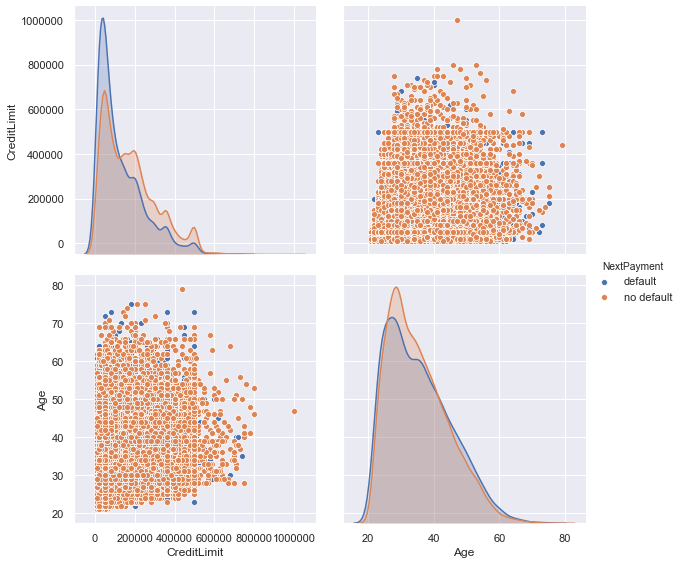

In [75]:
sns.pairplot(demographics,  hue='NextPayment', height=4)

In [76]:
demographics.groupby('Education').count()

,CreditLimit,Gender,MaritalStatus,Age,NextPayment
Education,,,,,
graduate school,10585,10585,10585,10585,10585
high school,4917,4917,4917,4917,4917
other,468,468,468,468,468
university,14030,14030,14030,14030,14030


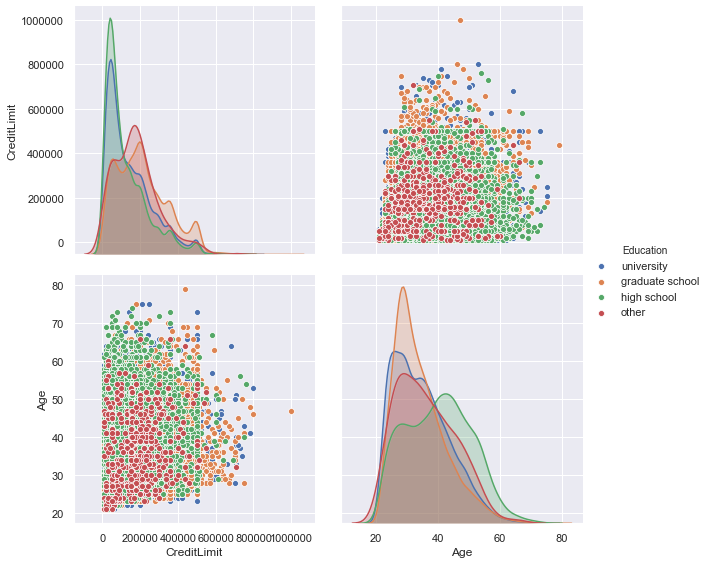

In [77]:
sns.pairplot(demographics,  hue='Education', height=4)

In [78]:
demographics.groupby('MaritalStatus').count()

,CreditLimit,Gender,Education,Age,NextPayment
MaritalStatus,,,,,
married,13659,13659,13659,13659,13659
other,377,377,377,377,377
single,15964,15964,15964,15964,15964


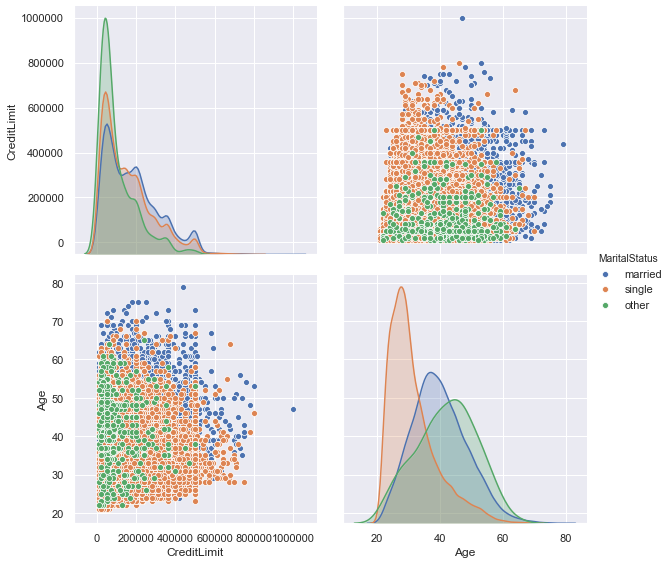

In [79]:
sns.pairplot(demographics,  hue='MaritalStatus', height=4)

### Plot bar graph of education

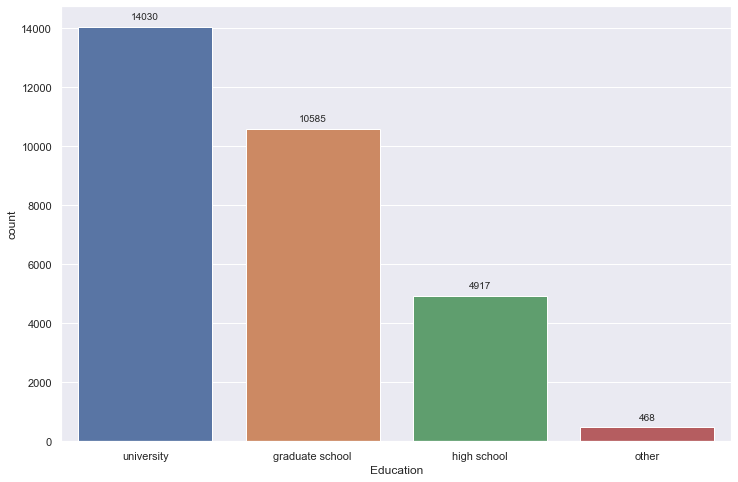

In [80]:
plt.figure(figsize=(12, 8))
count_edu = sns.countplot(x='Education', data=demographics)
for p in count_edu.patches:
    count_edu.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Plot bar graph of gender 

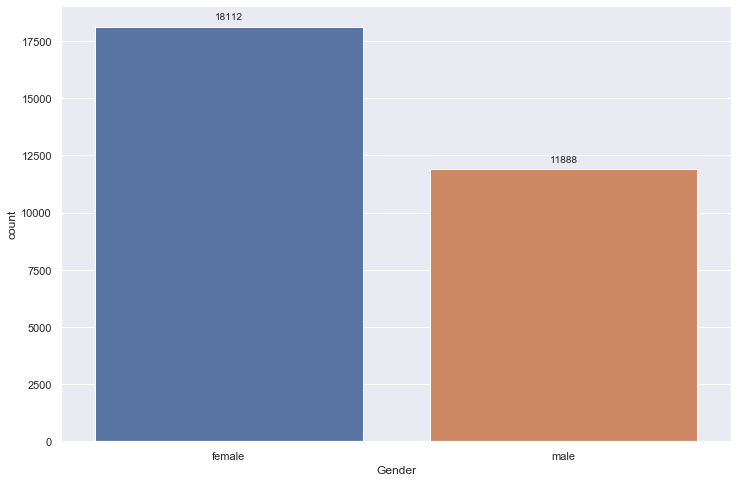

In [81]:
plt.figure(figsize=(12, 8))
count_gender = sns.countplot(x='Gender', data=demographics)
for p in count_gender.patches:
    count_gender.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Plot bar graph of marital status

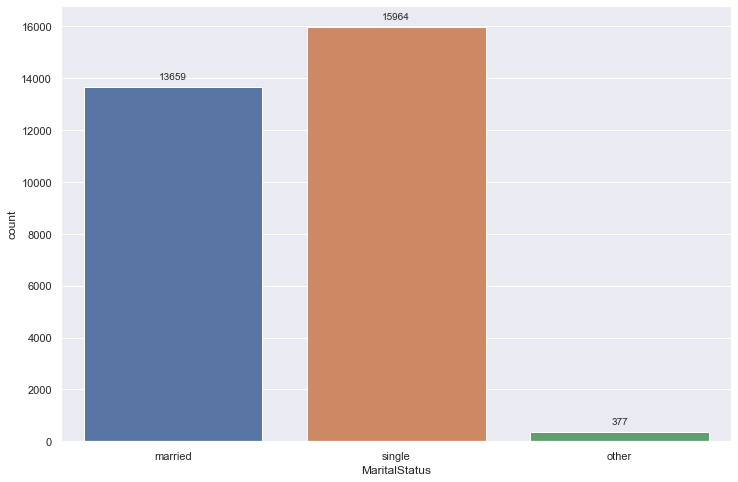

In [82]:
plt.figure(figsize=(12, 8))
count_marital = sns.countplot(x='MaritalStatus', data=demographics)
for p in count_marital.patches:
    count_marital.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Plot Defaults by Gender

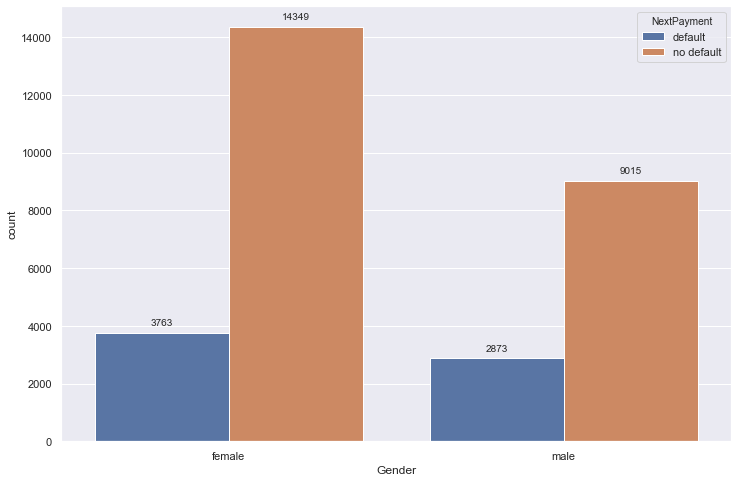

In [83]:
plt.figure(figsize=(12, 8))
count_gender_next_payment = sns.countplot(x='Gender', data=demographics, hue='NextPayment')
for p in count_gender_next_payment.patches:
    count_gender_next_payment.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [84]:
# #create two dataframes with default data and no default data
# default_demo = demographics[demographics.NextPayment=='default']
# notdefault_demo = demographics[demographics.NextPayment=='no default']

### Next Payment is a Default by Age Group

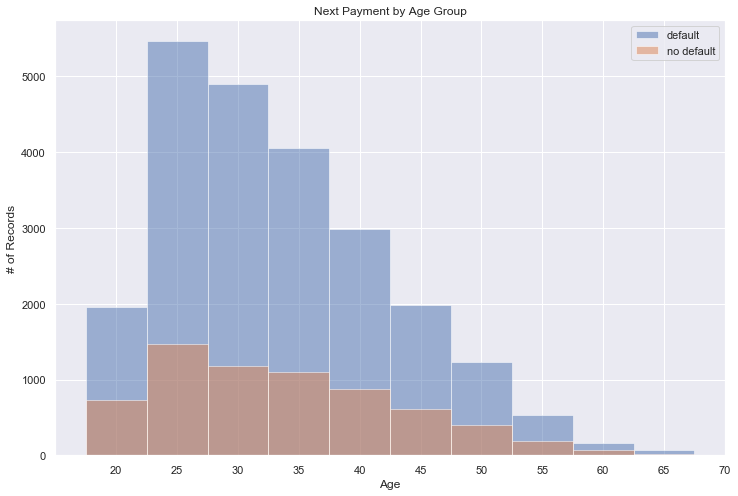

In [85]:
age_bin = np.arange(20,75,5)
plt.figure(figsize=(12,8))
plt.hist(demographics["Age"][demographics.NextPayment=='no default'], bins=age_bin, label='default', alpha=0.5, align='left')
plt.hist(demographics["Age"][demographics.NextPayment=='default'], bins=age_bin, label='no default', alpha=0.5, align='left')
#plt.plot(default_demo['Age'])
plt.xlabel('Age')
plt.xticks(age_bin)
plt.ylabel('# of Records')
plt.title('Next Payment by Age Group')
plt.legend(loc='best')

### Credit Card Defaults by Age and Credit Card Limit

Text(0, 0.5, 'Credit Card Limit')

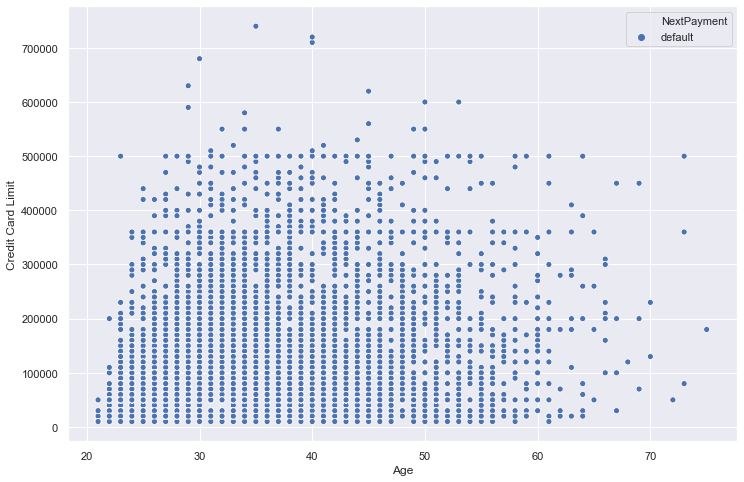

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age', y='CreditLimit', hue= 'NextPayment', data=demographics[demographics.NextPayment=='default'])
plt.xlabel('Age')
plt.ylabel('Credit Card Limit')

Text(0, 0.5, '# of Records')

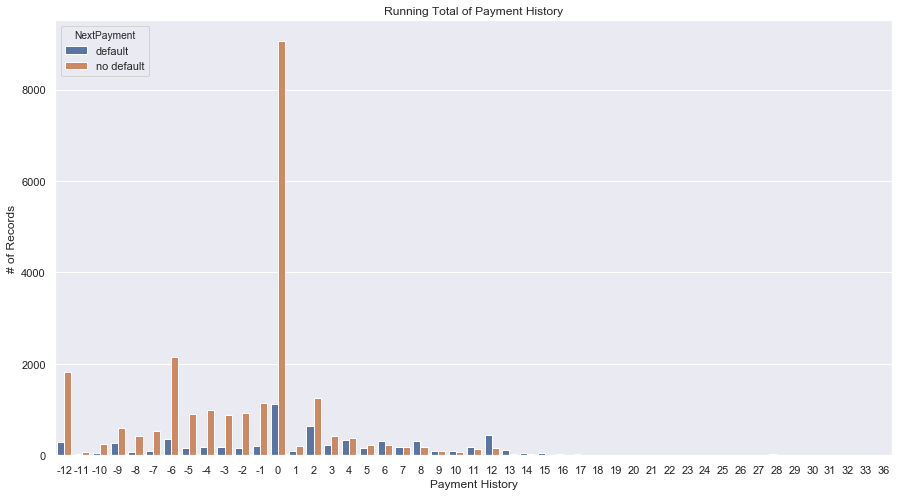

In [87]:
plt.figure(figsize=(15, 8))
sns.countplot(x='paymentHist', data=financials, hue='NextPayment')
plt.title('Running Total of Payment History')
plt.xlabel('Payment History')
plt.ylabel('# of Records')

Negative numbers means payments were made. Postive numbers mean delay/late payments or no payments were made

### RunningTotal of Payment History (defaults only)

Text(0, 0.5, '# of Records')

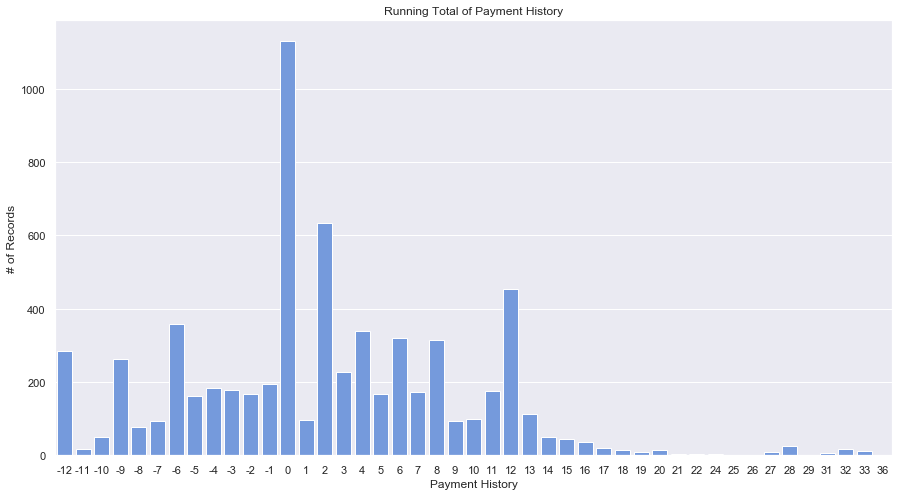

In [88]:
plt.figure(figsize=(15, 8))
sns.countplot(x='paymentHist', data=financials[financials.NextPayment=='default'], color='cornflowerblue')
plt.title('Running Total of Payment History')
plt.xlabel('Payment History')
plt.ylabel('# of Records')

In [89]:
fin_feng.describe()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,6monUtil,6monPmtRt,6monDfRt,Y
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.373048,0.380941,0.139033,0.221200
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.351890,7.671004,0.259050,0.415062
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-0.232590,-546.928571,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.029997,0.040952,0.000000,0.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.284834,0.084932,0.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.687929,0.586922,0.166667,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,5.364308,797.000000,1.000000,1.000000


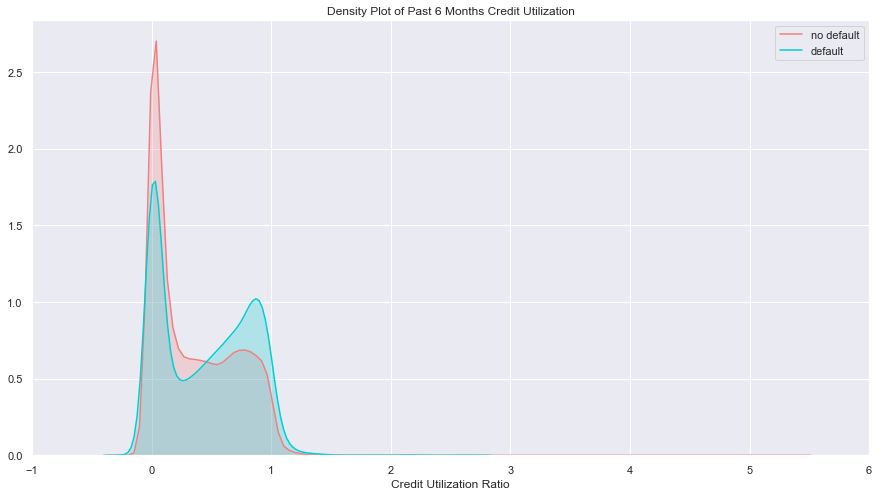

In [90]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(fin_feng["6monUtil"][fin_feng.Y == 0], color="lightcoral", shade=True)
sns.kdeplot(fin_feng["6monUtil"][fin_feng.Y == 1], color="darkturquoise", shade=True)

plt.legend(['no default', 'default'])
plt.title('Density Plot of Past 6 Months Credit Utilization')
ax.set(xlabel='Credit Utilization Ratio')
plt.xlim(-1,6)
plt.show()

In [91]:
fin_feng.describe()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,6monUtil,6monPmtRt,6monDfRt,Y
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.373048,0.380941,0.139033,0.221200
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.351890,7.671004,0.259050,0.415062
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-0.232590,-546.928571,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.029997,0.040952,0.000000,0.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.284834,0.084932,0.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.687929,0.586922,0.166667,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,5.364308,797.000000,1.000000,1.000000


Text(0.5, 1.0, 'Scatterplot of 6 month Credit Utilization and 6 Month Payment Ratio')

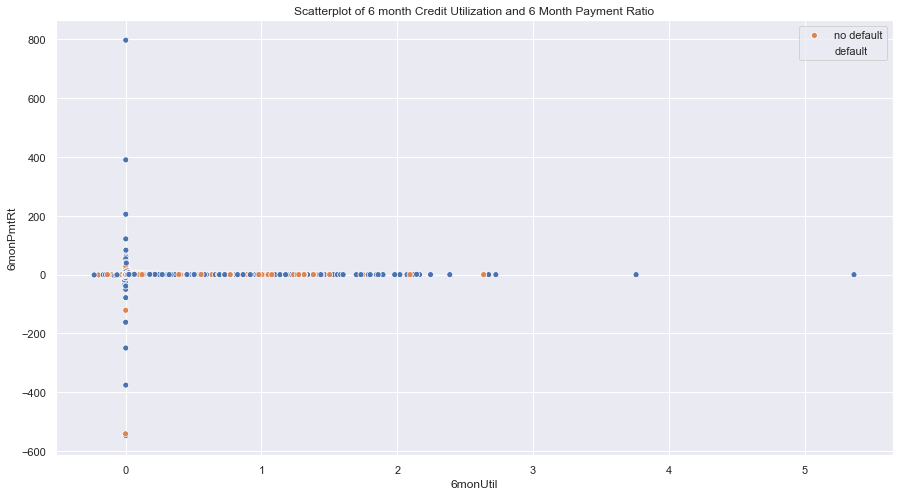

In [92]:
plt.figure(figsize=(15, 8))
#plt.scatter(fin_feng['6monUtil'], fin_feng['6monPmtRt'], hue='Y')
st = sns.scatterplot(x='6monUtil', y='6monPmtRt', hue='Y', data=fin_feng)
#plt.xlim(fin_feng['6monUtil'].quantile(.25), fin_feng['6monUtil'].quantile(.75) )
#plt.ylim(fin_feng['6monPmtRt'].quantile(.25), fin_feng['6monPmtRt'].quantile(.75))
plt.legend(['no default', 'default'])
plt.title('Scatterplot of 6 month Credit Utilization and 6 Month Payment Ratio')

Text(0.5, 1.0, 'Scatterplot of 6 month Credit Utilization and 6 Month Payment Ratio')

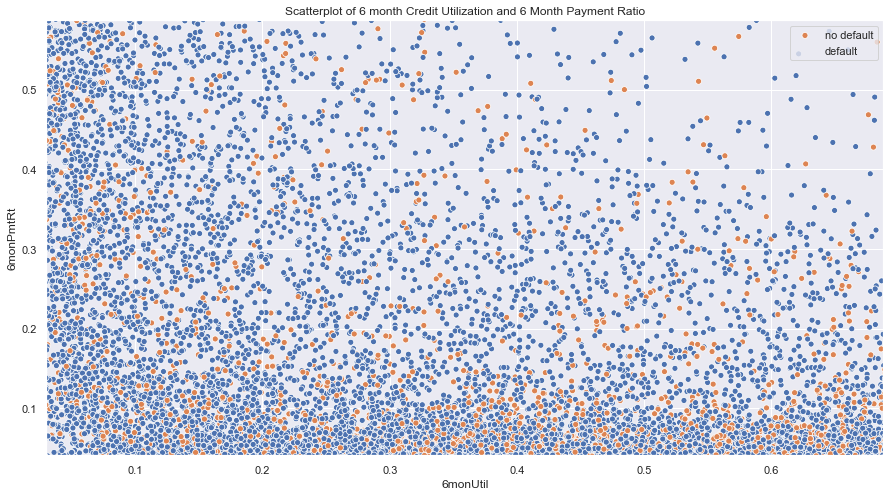

In [93]:
plt.figure(figsize=(15, 8))
#plt.scatter(fin_feng['6monUtil'], fin_feng['6monPmtRt'], hue='Y')
st = sns.scatterplot(x='6monUtil', y='6monPmtRt', hue='Y', data=fin_feng)
plt.xlim(fin_feng['6monUtil'].quantile(.25), fin_feng['6monUtil'].quantile(.75) )
plt.ylim(fin_feng['6monPmtRt'].quantile(.25), fin_feng['6monPmtRt'].quantile(.75))
plt.legend(['no default', 'default'])
plt.title('Scatterplot of 6 month Credit Utilization and 6 Month Payment Ratio')

# <a id="t4."></a>
# 4. Model Development and Results

<a id="t4.1."></a>
## 4.1. Feature Selection

<a id="t4.1.1."></a>
### 4.1.1. Recursive feature elimination

#### 4.1.1.1 Using dataset (ccd3) where get dummies function was used to convert categorical into dummy/indicator variables

In [94]:
#using dataset (ccd3) where get dummies function was used to convert categorical into dummy/indicator variables
rfe_X_cols = ['ID', 'CreditLimit', 'Age', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'paymentHist', '6monUtil','6monPmtRt','6monDfRt',
       'Gender_female', 'Gender_male', 'Education_graduate school',
       'Education_high school', 'Education_other', 'Education_university',
       'MaritalStatus_married', 'MaritalStatus_other', 'MaritalStatus_single']
rfe_X = ccd3[rfe_X_cols]
rfe_y = ccd3['NextPayment']
ccd3

,ID,CreditLimit,Age,X6,X7,X8,X9,X10,X11,X12,...,6monDfRt,Gender_female,Gender_male,Education_graduate school,Education_high school,Education_other,Education_university,MaritalStatus_married,MaritalStatus_other,MaritalStatus_single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0.333333,1,0,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0.333333,1,0,0,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,0.000000,1,0,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,0.000000,1,0,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0.000000,0,1,0,0,0,1,1,0,0
5,6,50000,37,0,0,0,0,0,0,64400,...,0.000000,0,1,1,0,0,0,0,0,1
6,7,500000,29,0,0,0,0,0,0,367965,...,0.000000,0,1,1,0,0,0,0,0,1
7,8,100000,23,0,-1,-1,0,0,-1,11876,...,0.000000,1,0,0,0,0,1,0,0,1
8,9,140000,28,0,0,2,0,0,0,11285,...,0.166667,1,0,0,1,0,0,1,0,0
9,10,20000,35,-2,-2,-2,-2,-1,-1,0,...,0.000000,0,1,0,1,0,0,0,0,1


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import RFE

# Build a logreg and compute the feature importances
model = LogisticRegression(solver='liblinear', max_iter=500)
# create the RFE model and select 8 attributes
rfe = RFE(model,10)
rfe = rfe.fit(rfe_X, rfe_y)
# summarize the selection of the attributes
print('Selected features: %s' % list(rfe_X.columns[rfe.support_]))

Selected features: ['X6', 'X7', 'X9', 'X11', '6monUtil', '6monDfRt', 'Gender_female', 'Gender_male', 'Education_other', 'MaritalStatus_single']


#### 4.1.1.2 Using dataset (ccd4) where categorical values were converted to integers

In [96]:
#using dataset (ccd4) where categorical values were converted to integers. 
rfe_X_gnb_cols = ['ID', 'CreditLimit', 'Gender', 'Education', 'MaritalStatus', 'Age',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'paymentHist', '6monUtil', '6monPmtRt', '6monDfRt']
rfe_X_gnb = ccd4[rfe_X_gnb_cols]
rfe_y_gnb = ccd4['NextPayment']
ccd4

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,NextPayment,paymentHist,6monUtil,6monPmtRt,6monDfRt
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,-2,0.064200,0.089434,0.333333
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,3,0.023718,0.292791,0.333333
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0.188246,0.108388,0.000000
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0.771113,0.036259,0.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,-2,0.364463,0.540054,0.000000
5,6,50000,1,1,2,37,0,0,0,0,...,1815,657,1000,1000,800,0,0,0.793713,0.032640,0.000000
6,7,500000,1,1,2,29,0,0,0,0,...,40000,38000,20239,13750,13770,0,0,0.908198,0.066343,0.000000
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,0,581,1687,1542,0,-3,0.022477,0.355257,0.000000
8,9,140000,2,3,1,28,0,0,2,0,...,0,432,1000,1000,1000,0,2,0.077633,0.103677,0.166667
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,1122,0,0,-10,0.224325,0.524871,0.000000


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import RFE

# Build a logreg and compute the feature importances
model = LogisticRegression(solver='liblinear', max_iter=500)
# create the RFE model and select 8 attributes
rfe = RFE(model,10)
rfe = rfe.fit(rfe_X_gnb, rfe_y_gnb)
# summarize the selection of the attributes
print('Selected features: %s' % list(rfe_X_gnb.columns[rfe.support_]))

Selected features: ['Gender', 'MaritalStatus', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', '6monUtil', '6monDfRt']


<a id="t4.1.2."></a>
### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

#### 4.1.2.1 Using dataset (ccd3) where get dummies function was used to convert categorical into dummy/indicator variables 

Optimal number of features: 7
Selected features: ['X6', 'X9', '6monUtil', '6monDfRt', 'Gender_female', 'Gender_male', 'Education_other']


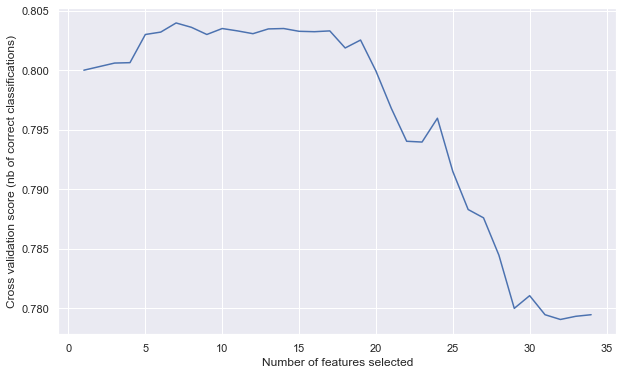

In [98]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(solver='liblinear', max_iter=500), step=1, cv=10, scoring='accuracy')
rfecv.fit(rfe_X, rfe_y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(rfe_X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### 4.1.2.2. Using dataset (ccd4) where categorical values were converted to integers

Optimal number of features: 2
Selected features: ['X6', '6monDfRt']


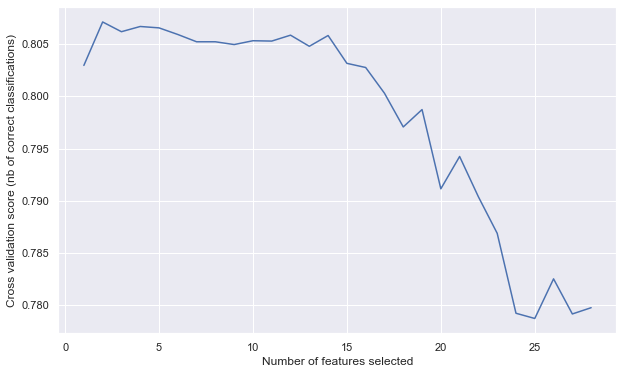

In [99]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(solver='liblinear', max_iter=500), step=1, cv=10, scoring='accuracy')
rfecv.fit(rfe_X_gnb, rfe_y_gnb)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(rfe_X_gnb.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<a id="t4.2."></a>
## 4.2 Split data into train/test

### 4.2.1. Split data into X and y for Naives Bayes Gausian Model (using ccd4)

In [100]:
# Split data into 'X' features and 'y' target label sets (GNB)
X_gnb=ccd4[rfe_X_gnb_cols]
y_gnb=ccd4['NextPayment']

In [101]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_gnb_train, X_gnb_test, y_gnb_train, y_gnb_test = train_test_split(X_gnb, y_gnb, test_size=0.3, random_state=101)

### 4.2.2. Split data into X and y for KNN and SVC Models (using ccd3)

In [102]:
# Split data into 'X' features and 'y' target label sets (KNN and SVC)
X=ccd3[rfe_X_cols]
y=ccd3['NextPayment']

In [103]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a id="t4.3."></a>
## 4.3. Heat Map of Selected Features

### 4.3.1. Using ccd3 select features

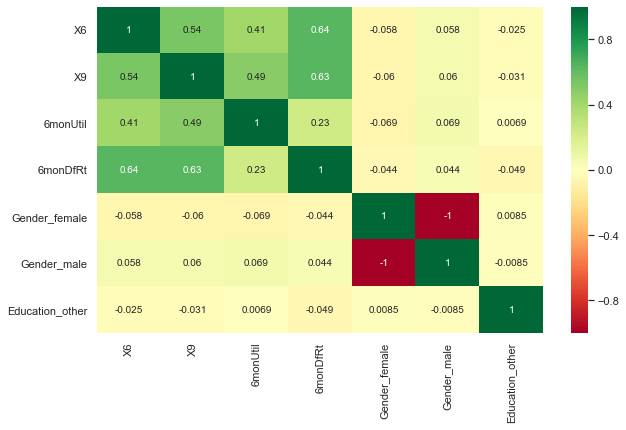

In [106]:
Selected_features = ['X6', 'X9', '6monUtil', '6monDfRt', 'Gender_female', 'Gender_male', 'Education_other']
X = ccd3[Selected_features]

plt.subplots(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### 4.3.2. Using ccd4 select features

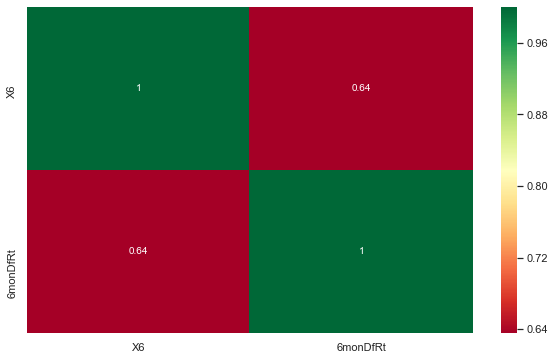

In [108]:
Selected_features = ['X6', '6monDfRt']
X = ccd4[Selected_features]

plt.subplots(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

<a id="t4.4."></a>
## 4.4. Naives Bayes Model

In [128]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create a Gaussian Classifier
model_gnb = GaussianNB()

# Train the model using the training sets
model_gnb.fit(X_gnb_train, y_gnb_train)

# Predict the response for test dataset
y_gnb_pred = model_gnb.predict(X_gnb_test)

In [129]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_gnb_test, y_gnb_pred))

Accuracy: 0.38422222222222224


In [111]:
print(classification_report(y_test, y_gnb_pred))

              precision    recall  f1-score   support

           0       0.88      0.25      0.39      7058
           1       0.24      0.88      0.38      1942

    accuracy                           0.38      9000
   macro avg       0.56      0.56      0.38      9000
weighted avg       0.75      0.38      0.39      9000



<a id="t4.5."></a>
## 4.5. K-Nearest Neighbours Model

In [112]:
# Import K-nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier

# Apply training data to knn model
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
knn_y_pred = model_knn.predict(X_test)
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      7058
           1       0.34      0.18      0.23      1942

    accuracy                           0.75      9000
   macro avg       0.57      0.54      0.54      9000
weighted avg       0.70      0.75      0.72      9000



In [114]:
print("Accuracy:",model_knn.score(X_test,y_test))

Accuracy: 0.746


<a id="t4.6."></a>
## 4.6. Support Vector Machine (SVM) Model

In [115]:
# Import svm model from sklearn
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Apply training data to svc model
model_svc = svm.SVC(gamma='auto')
model_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
svc_y_pred = model_svc.predict(X_test)
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7058
           1       0.00      0.00      0.00      1942

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.62      0.78      0.69      9000



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
print("Accuracy:",model_svc.score(X_test,y_test))

Accuracy: 0.7842222222222223
